In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import copy

from UtilsGA import *
from UtilsMCMC import *

In [196]:
# Create knoweldgebase

S=5
tau=0.9
eps=0.2

ListOfEntities,ListOfEvents,PrPos=CreateKB(S)
PrPos[PrPos>=0.5]=tau   # randomly set some of the probabilities equal to tau
PrPos[PrPos<0.5]=eps    # set the remaining probabilities as eps
    
Ideal_probabilities=np.reshape(PrPos,[1,S*S])
  # we expect that the ideal network is the one with links of probilities of \tau
IdealNetwork=np.array(Ideal_probabilities>=tau).astype(int)
IdealNetwork=Diag_zero(IdealNetwork[0],S)
IdealPosterior=Calc_likelihood(IdealNetwork,PrPos,S)


0.99999999999999978

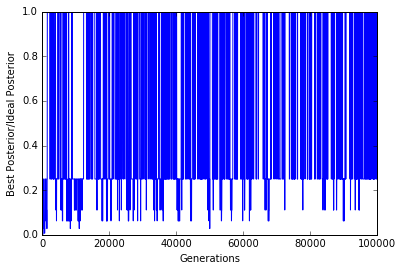

In [202]:
# # Create a population of solutions

PopSize=50
NumGen=100000

Population=[]
Fitness=np.empty(PopSize)
MAP=-1

for i in range(0,PopSize):
    Population.append(  [random.randint(0, 1) for i in range(S**2)] )
    
## calculate their negative log-posterior as fitness
for i in range(0,PopSize):
    likelihood=Calc_likelihood(Population[i],PrPos,S)
    Fitness[i]=-np.log(likelihood)



f=0
MinFit=np.empty(shape=[1, NumGen])
MaxFit=np.empty(shape=[1, NumGen])
AverageFit=np.empty(shape=[1, NumGen])



#print(Population)
#print(Fitness)
for n in range(0,NumGen):
    
    
    # SELECT TWO PARENTS RANDOMLY
    
    index1=random.randint(0,PopSize-1)
    index2=random.randint(0,PopSize-1)
    
    Parent1=Population[index1]
    Parent2=Population[index2]

    Fitness_Parent1=Fitness[index1]
    Fitness_Parent2=Fitness[index2]
    
    # Do Crossover
    
    CrossPoint=random.choice(range(0,S**2))
    
    Child1=np.hstack([Parent1[0:CrossPoint],Parent2[CrossPoint:]])
    likelihood_Child1=Calc_likelihood(Child1,PrPos,S)
    Fitness_Child1=-np.log(likelihood_Child1)
     
    
    Child2=np.hstack([Parent2[0:CrossPoint],Parent1[CrossPoint:]])
    likelihood_Child2=Calc_likelihood(Child2,PrPos,S)
    Fitness_Child2=-np.log(likelihood_Child2)
    
    #print(Fitness_Child1,Fitness_Child2)
    
    fy=likelihood_Child1 * likelihood_Child2
    fx=np.exp(-Fitness_Parent1)* np.exp(-Fitness_Parent2)
    
    if fx<10**-5:
        fx=10**-5 
     
    rho = min(0, np.log10(fy)-np.log10(fx))
    u=np.log10(np.random.uniform()) 
    #rho = min(1, fy/fx)
    #u = np.random.uniform() 

    if u < rho:  # replace parents with childs

        Population[index1]=list(Child1)
        Population[index2]=list(Child2)
        f=f+1
        Fitness[index1]=Fitness_Child1   
        Fitness[index2]=Fitness_Child2 
        
       
        #############################################
    # Do Mutation
    
    test=copy.copy(Population[index1])
    mutant1=Mutation(test,S)
    likelihood_mutant1=Calc_likelihood(mutant1,PrPos,S)
         
    fy=likelihood_mutant1
    fx=np.exp(-Fitness[index1])
        
    if fx<10**-5:
        fx=10**-5 
            
    rho = min(0, np.log10(fy)-np.log10(fx))
    u=np.log10(np.random.uniform())         
    #rho = min(1, fy/fx)
    #u = np.random.uniform() 
    if u < rho:  # replace parents with childs
        Population[index1]=mutant1  
        Fitness[index1]=-np.log(likelihood_mutant1)
        f=f+1

        
    test=copy.copy(Population[index2])
    mutant2=Mutation(test,S)
    likelihood_mutant2=Calc_likelihood(mutant2,PrPos,S)
      
    fy=likelihood_mutant2
    fx=np.exp(-Fitness[index2])
        
    if fx<10**-5:
        fx=10**-5 
            
    rho = min(0, np.log10(fy)-np.log10(fx))
    u=np.log10(np.random.uniform())         
    #rho = min(1, fy/fx)
    #u = np.random.uniform()
       
    if u < rho:  # replace parents with childs
        Population[index2]= mutant2  #  
        Fitness[index2]=-np.log(likelihood_mutant2)
        f=f+1
    #print(Population)
    #print(Fitness)
        
    ##################
        
        
    MinFit[0,n]=np.min(Fitness)
    if np.exp(-MinFit[0,n]) > MAP:
        index=np.argmin(Fitness)
        MAP_sample=Population[index]
        MAP=np.exp(-MinFit[0,n])
    
    #MaxFit[0,n]=np.max(Fitness)
    AverageFit[0,n]=np.exp(-MinFit[0,n])/IdealPosterior 

plt.plot(AverageFit[0])
plt.xlabel('Generations')
plt.ylabel('Best Posterior/Ideal Posterior')
np.exp(-np.min(MinFit))/IdealPosterior

In [193]:
f

816

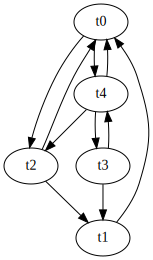

In [203]:
sketch(ListOfEntities,np.reshape(IdealNetwork,[S,S]))


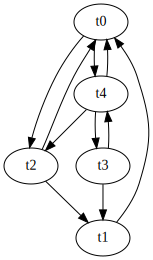

In [204]:
sketch(ListOfEntities,np.reshape(MAP_sample,[S,S]))

In [165]:
Calc_likelihood(MAP_sample,PrPos,S)

7.5728592443407003e-10

In [166]:
IdealPosterior

0.0040199887178406111

In [167]:
np.exp(-np.min(MinFit))

9.2521697609808426e-109

##########

In [199]:
niters=250000

naccept = 0
Adj = [random.randint(0, 1) for i in range(S**2)]

MAP=-1

for i in range(0,niters):
        #if i % 10000==0:
            #print('iteration= ',i)
    #Adj_reshaped=np.reshape(Adj,[S,S])
    likelihood=Calc_likelihood(Adj,PrPos,S)
    prior=1 #Calc_prior(Adj_reshaped,S)
    fx=prior * likelihood
   

    Adj_p=Mutation(Adj,S)
    likelihood=Calc_likelihood(Adj_p,PrPos,S)
    prior=1 #Calc_prior(Adj_p_reshaped,S)
    fy=prior * likelihood 
    
        #rho = min(1, fy/fx)

    if fx<10**-5:
        fx=10**-5 
    rho = min(0, np.log10(fy)-np.log10(fx))
        #u = np.random.uniform()
    u=np.log10(np.random.uniform())  
    if u < rho:
        naccept += 1
        Adj = Adj_p

        if fy>MAP:
            MAP=fy
            MAP_sample=copy.copy(Adj_p) #Adj_p
    
    #return MAP, MAP_sample#, NetworksDict

    
MAP/IdealPosterior


0.11111111111111109

In [71]:
naccept

9

In [79]:
min(Fitness)

9.7524892017434457

In [80]:
np.argmin(Fitness)

34

In [81]:
Fitness[34]

9.7524892017434457

In [115]:
np.argmin(MinFit)

9773

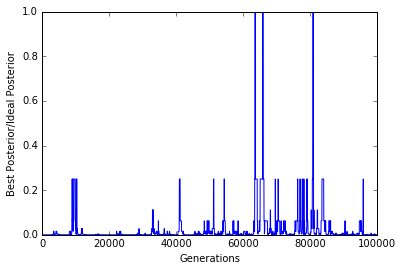

In [178]:
plt.plot(AverageFit[0])


In [3]:
10/(2**20)

9.5367431640625e-06